# Research assignment 4


[your name] Waleed Rajabally

[working title of the project] State Party and School Debt in Privatized Colleges

[date] 4/3/2020

## 1. Develop hypotheses about interactions between your independent variables [1 pt]

You can use the GSS data, Student aid data, or your own data

    A. Write at least two hypotheses involving at least 2 of the following types of interactions
        1) nominal * nominal
        2) nominal * interval-ratio
        3) interval-ratio * interval-ratio
        
  Hypotheses:
      1) The two nominal IV's I'm comparing are the degree level offerred (iclevel) and politcal party of the state(state_party), which I created that reflects the seven of the most conservative and liberal states in 2014 according to the Pew Research Center.  I am testing the effect of state political party with loan amount (my DV), controlling for degree level offered.  My theory is that Republican voting states may have less regulations and less corporate taxes, which may enable greater exploitive practices.  Therefore Republican voting states will have a greater amount of 4 year or more degrees, which will produce an interactive effect.
      2) As for the nominal interval-ratio interacatin.  I am comparing state party with pell grant awarded, with the same DV as mentioned, loan amount.  Since the pell grants are federally funded the political leanings of the state should not affect the amount of pell grants distributed.  If there is a difference, this would imply that state policies, shaped by political perspectives, may have an influence on federally funded grants.  I hypothesize that there will be no interactive effect.
        
        
    B. State the predicted direction of association between your dependent variable and:
        1) each of the 2 independent variables by themselves
        2) the interaction of the 2 indendent variables
        3) you can predict that there is no association
        
There will be a positive association between number of 4 year degrees or more offered and the political party of the state and I believe that level debt will be greater with both of these IVs, so when they interact the effect will be multiplied.  
I don't think they'll be any association between pell grants and state party because theoretically, pell grants are government funds and should not be influenced by state policy.
        
    C. Write a couple sentences about the theoretical reasons (prior knowledge / research) for each of your predictions
    
    I believe that since private colleges are exploitive they will thrive in states that have less regualtion and corportate taxation, which I theorize will be greater in Republican states. 

## 2. Test your hypotheses [3 pts]

    A. For each hypothesized interactive relationship: use regression with the appropriate interaction syntax to estimate a 1 model with uninteracted variables and 1 model with interacted variables. Use --esttab-- with %html magic to output a model with the 2 tables
    
    B. Use margins and marginsplot with the appropriate syntax to visually represent your regression adjusted estimates for given nominal categories or at given interval-ratio values

In [6]:
clear
use /Users/waleed/Desktop/gradstats2/week9/forprofits20200317.dta
/*
gen str state_party = "Republican" if state_n == "Arizona" | state_n == "Arkansas" | state_n == "Alabama" | state_n == "Florida" | state_n == "Louisiana" | state_n == "Idaho" | state_n == "Indiana" | state_n == "Iowa" | state_n == "Kansas" | state_n == "Kentucky" | state_n == "Georgia" | state_n == "Mississippi" | state_n == "Missouri" | state_n == "Montana" | state_n == "Nebraska" | state_n == "North Carolina" | state_n == "North Dakota" | state_n == "Ohio" | state_n == "Oklahoma" | state_n == "South Carolina" | state_n == "South Dakota" | state_n == "Tennessee" | state_n == "Texas" | state_n == "Utah" | state_n == "Virginia" | state_n == "West Virginia" | state_n == "Wisconsin" | state_n == "Wyoming"

replace state_party = "Democrat" if state_n == "Colorado" | state_n == "California" | state_n == "Connecticut" | state_n == "Delaware" | state_n == "Illinois" | state_n == "Maine" | state_n == "Maryland" | state_n == "Massachusetts" | state_n == "Nevada" | state_n == "New Hampshire" | state_n == "New York" | state_n == "New Jersey" | state_n == "Oregon" | state_n == "Rhode Island" | state_n == "Washington" | state_n == "District of Columbia" | state_n == "Vermont" 
*/

*quietly gen republican = 1 if state_party == "Republican"
quietly replace republican = 0 if republican == .

/*
I would then use this syntax for the interactions.

reg loan_amount_borrower_c_w i.republican##c.dist_pell_s

note that the i. prefix indicates that republican is an indicator variable (i.e. nominal) and the c.prefix indicates that dist_pell_s is a continuous (i.e. interval ratio variable).

I think this should help you to produce some results that you can interpret.
*/

*quietly gen four_or_more = 1 if iclevel == "Four or more years"
quietly replace four_or_more = 0 if four_or_more == . 
quietly replace four_or_more = 1 if four_or_more == 2


reg loan_amount_borrower_c_w i.republican##i.four_or_more
reg loan_amount_borrower_c_w i.republican##c.dist_pell_s









      Source |       SS           df       MS      Number of obs   =     1,198
-------------+----------------------------------   F(3, 1194)      =     36.59
       Model |   382794951         3   127598317   Prob > F        =    0.0000
    Residual |  4.1643e+09     1,194  3487696.25   R-squared       =    0.0842
-------------+----------------------------------   Adj R-squared   =    0.0819
       Total |  4.5471e+09     1,197  3798750.44   Root MSE        =    1867.5

-----------------------------------------------------------------------------------------
loan_amount_borrower_~w |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
------------------------+----------------------------------------------------------------
           1.republican |   366.9365   138.0407     2.66   0.008     96.10715    637.7658
         1.four_or_more |  -927.4765   177.8083    -5.22   0.000    -1276.328   -578.6251
                        |
republican#four_or_more |
                

In [8]:
est clear
quietly eststo: reg loan_amount_borrower_c_w i.republican i.four_or_more 
quietly eststo: reg loan_amount_borrower_c_w i.republican##i.four_or_more

In [9]:
%html
esttab, stats(r2 N, labels("R2" "N") fmt(%10.2fc %10.0fc)) cells(b(star fmt(%10.0fc)) se(fmt(%6.0fc) par) N (fmt(%10.0fc)) r2 (fmt(%10.2f))) ///
  nobase noconstant starlevels(* .1 ** .05 *** .01) mlabels("Model 1" "Model 2")  html

This front-end or document format cannot display HTML

In [11]:
est clear
quietly eststo: reg loan_amount_borrower_c_w i.republican c.dist_pell_s 
quietly eststo: reg loan_amount_borrower_c_w i.republican##c.dist_pell_s

In [12]:
%html
esttab, stats(r2 N, labels("R2" "N") fmt(%10.2fc %10.0fc)) cells(b(star fmt(%10.0fc)) se(fmt(%6.0fc) par) N (fmt(%10.0fc)) r2 (fmt(%10.2f))) ///
  nobase noconstant starlevels(* .1 ** .05 *** .01) mlabels("Model 1" "Model 2") html
  

This front-end or document format cannot display HTML





  Variables that uniquely identify margins: republican four_or_more


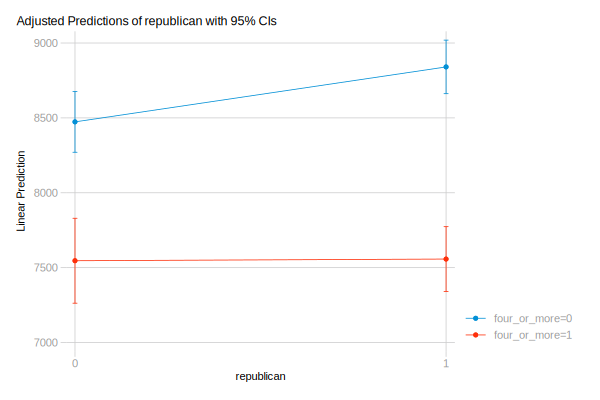

In [14]:
quietly eststo: reg loan_amount_borrower_c_w i.republican##i.four_or_more
quietly margins republican, over(four_or_more) atmeans
marginsplot, scheme(538w)







  Variables that uniquely identify margins: dist_pell_s republican


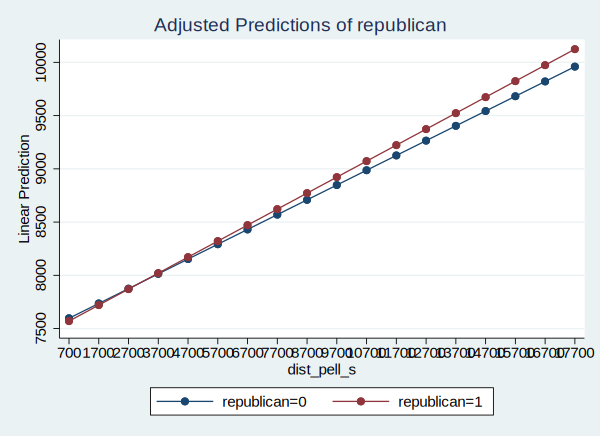

In [20]:
quietly eststo: reg loan_amount_borrower_c_w i.republican##c.dist_pell_s
quietly margins republican, at(dist_pell_s=(700 (1000) 18000))
marginsplot, noci



## 3. Interpret your results [1 pt]

Write a couple sentences answering each of the following questions:

    A. Do the results support or contradict each of your hypotheses?
The results do not support my first hypothesis, as it does not seem that the political affiliation of the state influences amount of debt with the covariate of four year colleges or more.  My second hypothesis is correct in that there was no association between with the amount of debt accrued, and Republican states and amount of pell grants distributed.  This is because pell grants are federal and therefore state policy should not have an effect on pell grants awarded, and hence don't influence debt.  This is based on the p-value of the interaction variable.
    
    B. Why do the regression coefficients support or contradict your hypotheses?
By adding the coefficients in the first interaction equation, between the nominal variable of 4 year college (-927) and the interaction term (-356), we get -1238.  This means that for year colleges in Republican states have 1238.00 less amount of grants than non-4 year colleges in Democratic states.

For the second model, with the interaction between Republican states and amount of pell grants awarded, the coefficient for pell grant distribution is zero and therefore no interaction that is taking place.
    
    C. Why do your regression adjusted estimates from margins for nominal categories or given interval-ratio values support or contradict your hypotheses?

The margins plot for the both interaction equations show slight differences between the respective models.  For the first interaction equation it shows that there is barely any interacton occuring which does not support my hypothesis.  My second hypothesis for the interaction with Republican states and pell grants is confirmed, because there is little interaction occuring.